In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
df = pd.read_csv('twitter_training.csv')
df.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Rename all columns

In [2]:
df.rename(columns={'Positive': 'results'}, inplace=True)
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'tweets'}, inplace=True)
df.rename(columns={'Borderlands': 'places'}, inplace=True)
df.rename(columns={'2401': 'id'}, inplace=True)

In [3]:
df.head(5)

,id,places,results,tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Check unique values of Results

In [4]:
unique_values = df['results'].unique()

print(unique_values)

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [5]:
df.isnull().sum()

id           0
places       0
results      0
tweets     686
dtype: int64

In [6]:
df[df.duplicated()]

,id,places,results,tweets
19,2404,Borderlands,Positive,that was the first borderlands session in a lo...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
50,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
63,2411,Borderlands,Neutral,.. [
145,2425,Borderlands,Negative,"""What a bitch!"""
...,...,...,...,...
74504,9171,Nvidia,Neutral,This benchmarking comparison between Oculus Qu...
74509,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
74588,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74618,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


# Change values of results

In [7]:
df['results']=df['results'].map({'Positive':+1,'Negative':-1,'Neutral':0,'Irrelevant':+2})

# Result value plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


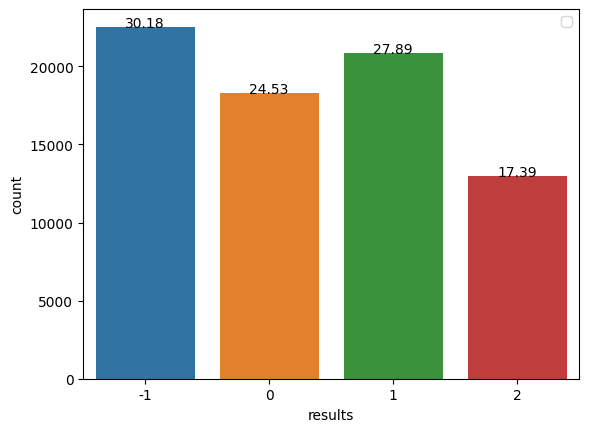

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from matplotlib import pyplot as plt
total = float(df.shape[0])
ploting = sns.countplot(x='results', data=df)
for p in ploting.patches:
    height = p.get_height()
    ploting.text(p.get_x() + p.get_width()/2.,
           height,
           '{:.2f}'.format((height/total)*100),
           ha='center')
           
plt.legend()
plt.show()

# Different result value plotting

<Axes: >

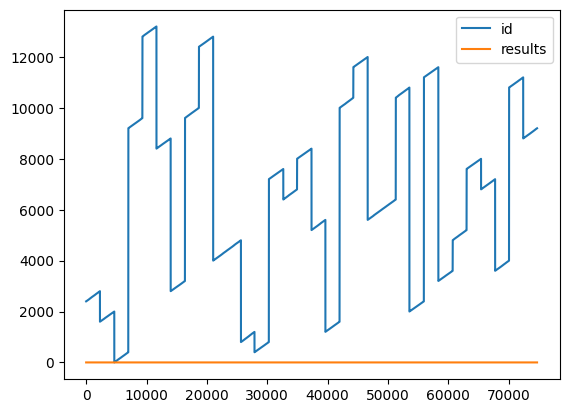

In [9]:
df.plot()

In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Tokenize
        tokens = text.split()
        
        # Remove stopwords
        tokens = [token for token in tokens if token not in stop_words]
        
        # Lemmatize
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        # Join the tokens back into a string
        preprocessed_text = ' '.join(tokens)
        
        return preprocessed_text
    else:
        # If the input is not a string, return the original value
        return text

df['preprocessed_tweets'] = df['tweets'].apply(preprocess_text)

In [13]:
df.head()

,id,places,results,tweets,preprocessed_tweets
0,2401,Borderlands,1,I am coming to the borders and I will kill you...,"coming border kill all,"
1,2401,Borderlands,1,im getting on borderlands and i will kill you ...,"im getting borderland kill all,"
2,2401,Borderlands,1,im coming on borderlands and i will murder you...,"im coming borderland murder all,"
3,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,"im getting borderland 2 murder all,"
4,2401,Borderlands,1,im getting into borderlands and i can murder y...,"im getting borderland murder all,"


# Training dataset

In [14]:
X = df['preprocessed_tweets'].fillna('')
y = df['results']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer Apply

In [15]:
# Apply TF-IDF vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression

C:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


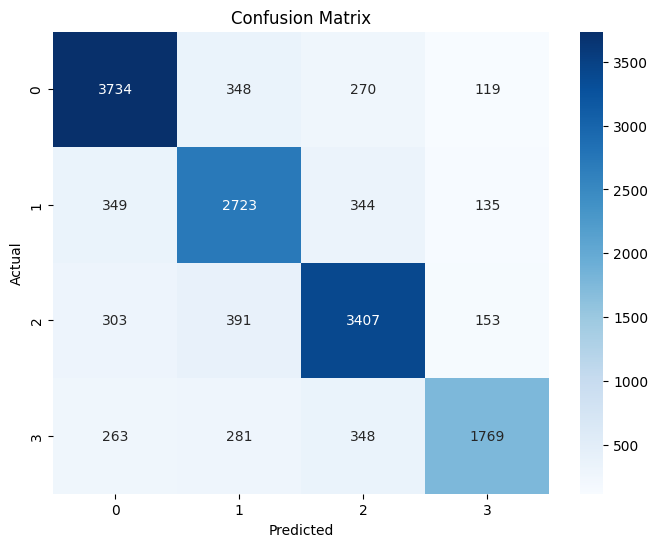

Accuracy: 0.78
F1-score: 0.77


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Create a visual confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')

# Random Forest

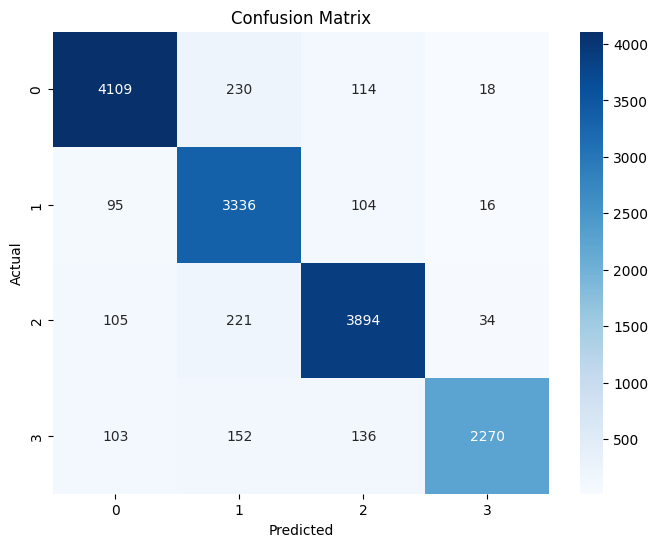

Accuracy: 0.91
F1-score: 0.91


In [17]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate the Random Forest Classifier
y_pred = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Create a visual confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')

# Decision tree

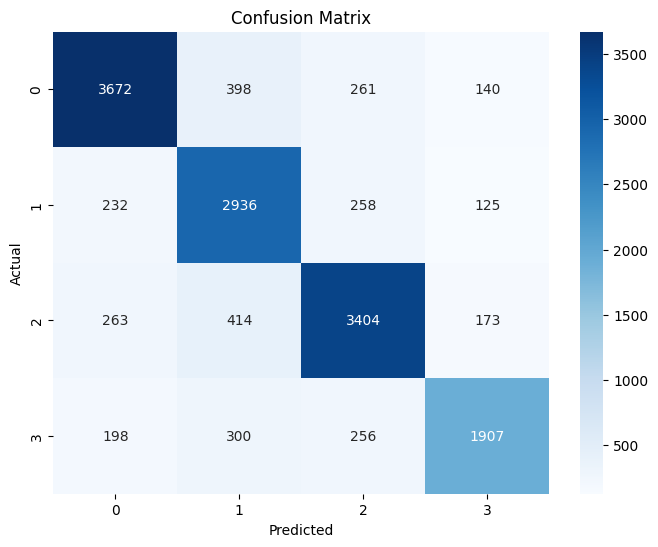

Accuracy: 0.80
F1-score: 0.79


In [18]:
from sklearn.tree import DecisionTreeClassifier
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# Evaluate the Decision Tree Classifier
y_pred = dt_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Create a visual confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')

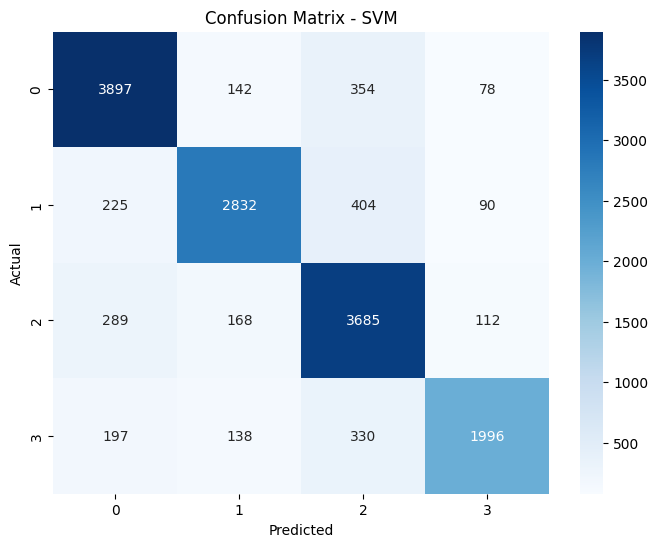

Accuracy: 0.83
F1-score: 0.83


In [19]:
from sklearn.svm import SVC
# Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Evaluate the SVM model
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Create a visual confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')

# Positive tweets cloud

In [20]:
pip install wordcloud


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


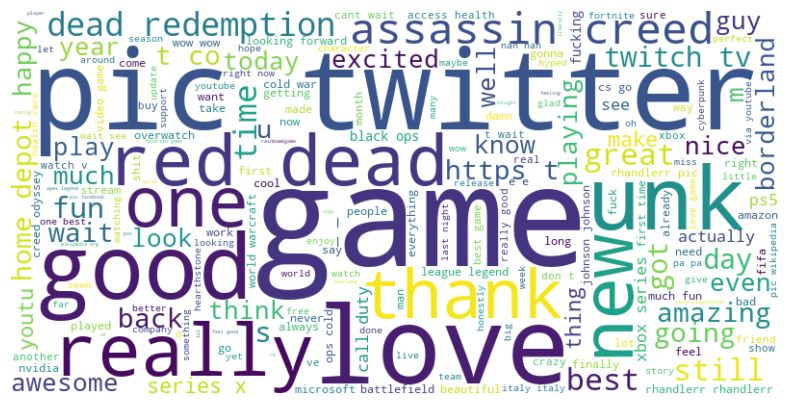

In [21]:

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
#df = pd.read_csv('your_file.csv')

# Filter positive tweets
positive_tweets = df[df['results'] == 1]['preprocessed_tweets']

# Convert tweets to strings and filter out any NaN values
positive_tweets = positive_tweets.astype(str).dropna()

# Concatenate all positive tweets into a single string
positive_tweets_text = ' '.join(positive_tweets)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative wordcloud

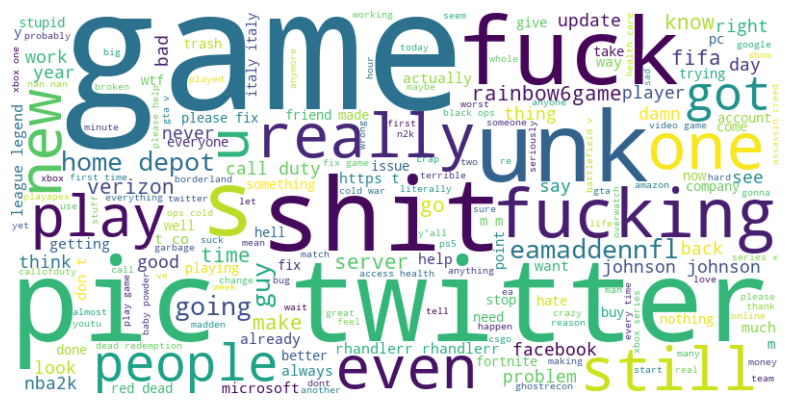

In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
#df = pd.read_csv('your_file.csv')

# Filter positive tweets
positive_tweets = df[df['results'] == -1]['preprocessed_tweets']

# Convert tweets to strings and filter out any NaN values
positive_tweets = positive_tweets.astype(str).dropna()

# Concatenate all positive tweets into a single string
positive_tweets_text = ' '.join(positive_tweets)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Neutral tweets word cloud

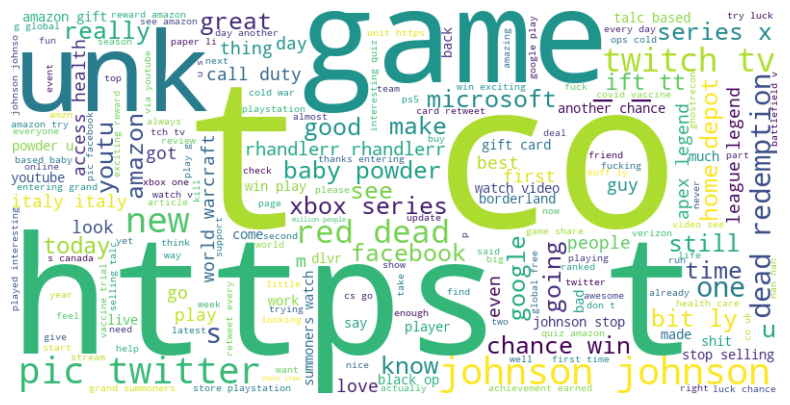

In [23]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
#df = pd.read_csv('your_file.csv')

# Filter positive tweets
positive_tweets = df[df['results'] == 0]['preprocessed_tweets']

# Convert tweets to strings and filter out any NaN values
positive_tweets = positive_tweets.astype(str).dropna()

# Concatenate all positive tweets into a single string
positive_tweets_text = ' '.join(positive_tweets)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Irrelevent Tweets word cloud

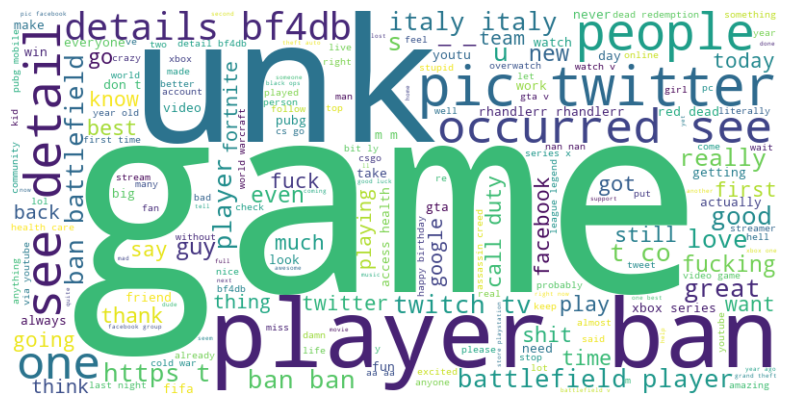

In [24]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
#df = pd.read_csv('your_file.csv')

# Filter positive tweets
positive_tweets = df[df['results'] == +2]['preprocessed_tweets']

# Convert tweets to strings and filter out any NaN values
positive_tweets = positive_tweets.astype(str).dropna()

# Concatenate all positive tweets into a single string
positive_tweets_text = ' '.join(positive_tweets)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()